# Importing libraries and classes

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

from tabulate import tabulate
from sklearn.metrics import median_absolute_error, max_error, mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
from sklearn.model_selection import KFold
from Utils import Utils

from DecisionTreeRegressor import DecisionTreeRegressor
from RandomForestRegressor import RandomForestRegressor
from LinearRegression import LinearRegression

# Reading and splitting the data

In [2]:
df = pd.read_csv('./NSO_Population_Sex_dataset/NSO_POPULATION_DATA_CLEANED.csv')

feature_cols = ['District', 'Sex', 'Year', 'Population_Growth_Rate','Average_Population']
X = pd.get_dummies(df[feature_cols], columns=['District', 'Sex'])
y = df["Population"]

NUM_OF_RUNS = 2
NUM_CORES = 4
KF = KFold(n_splits=NUM_OF_RUNS, shuffle=True, random_state=42)

# Custom Implementations - Decision Tree, Random Forest, Linear Regression

In [3]:
# Decision Trees Hyperparameter tuning & cross validation
DT_Parameters = {
    'min_samples_split': [2, 3, 4, 5, 10, 15, 20],
    'max_depth': [10, 25, 50, 75, 100, 125, 150, 175, 200]
}

DT_All_Best_Predictions = []
DT_Total_Time = 0.0
DT_Total_MSE = 0.0
DT_Total_MAE = 0.0
DT_Total_RMSE = 0.0
DT_Total_R2 = 0.0
DT_Total_Explained_Variance = 0.0
DT_Total_MedianAE = 0.0
DT_Total_MaxError = 0.0

for run, (train_index, test_index) in enumerate(KF.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    DT_Best_Model = None
    DT_Best_Prediction = None
    DT_Best_Parameters = None
    DT_Best_Time = None
    DT_Best_MSE = float('inf')

    for min_samples_split in DT_Parameters['min_samples_split']:
        for max_depth in DT_Parameters['max_depth']:
            DT_Start_Time = time.time()
            DT_Temp_Model = DecisionTreeRegressor(min_samples_split=min_samples_split, max_depth=max_depth)
            DT_Temp_Model.fit(X_train.values, y_train.values)
            DT_Temp_Prediction = DT_Temp_Model.predict(X_test.values)
            DT_End_Time = time.time()
            DT_Temp_Time = DT_End_Time - DT_Start_Time
            DT_Temp_MSE = mean_squared_error(y_test, DT_Temp_Prediction)

            # Determining best hyperparameters based on MSE
            if DT_Temp_MSE < DT_Best_MSE:
                DT_Best_Model = DT_Temp_Model
                DT_Best_Parameters = {'min_samples_split': min_samples_split, 'max_depth': max_depth}
                DT_Best_Prediction = DT_Temp_Prediction
                DT_Best_Time = DT_Temp_Time
                DT_Best_MSE = DT_Temp_MSE

    # Storing values to find average after all runs finished
    DT_All_Best_Predictions.append(DT_Best_Prediction)
    DT_Total_Time = DT_Total_Time + DT_Best_Time
    DT_Total_MSE = DT_Total_MSE + DT_Best_MSE
    DT_Total_MAE = DT_Total_MAE + mean_absolute_error(y_test, DT_Best_Prediction)  # Mean Absolute Error
    DT_Total_RMSE = DT_Total_RMSE + Utils.root_mean_squared_error(y_test, DT_Best_Prediction)  # Root Mean Squared Error
    DT_Total_R2 = DT_Total_R2 + r2_score(y_test, DT_Best_Prediction)  # R-squared
    DT_Total_Explained_Variance = DT_Total_Explained_Variance + explained_variance_score(y_test, DT_Best_Prediction)  # Explained Variance Score
    DT_Total_MedianAE = DT_Total_MedianAE + median_absolute_error(y_test, DT_Best_Prediction)  # Median Absolute Error
    DT_Total_MaxError = max_error(y_test, DT_Best_Prediction)  # Maximum Error

    print(f"Run {run + 1}")

# Here we need to find the average evaluation values across all runs
DT_All_Best_Predictions = np.array(DT_All_Best_Predictions)
DT_Average_Predictions = np.mean(DT_All_Best_Predictions, axis=0)
DT_Average_Time = DT_Total_Time / NUM_OF_RUNS
DT_Average_MSE = DT_Total_MSE / NUM_OF_RUNS
DT_Average_MAE = DT_Total_MAE / NUM_OF_RUNS
DT_Average_RMSE = DT_Total_RMSE / NUM_OF_RUNS
DT_Average_R2 = DT_Total_R2 / NUM_OF_RUNS
DT_Average_Explained_Variance = DT_Total_Explained_Variance / NUM_OF_RUNS
DT_Average_MedianAE = DT_Total_MedianAE / NUM_OF_RUNS
DT_Average_MaxError = DT_Total_MaxError / NUM_OF_RUNS

print(f"\nDecision Tree Metrics over {NUM_OF_RUNS} runs:")
print(f"Average Time to run in seconds: {DT_Average_Time:.6f}")
print(f"Average Mean Squared Error: {DT_Average_MSE:.6f}")
print(f"Average Root Mean Squared Error: {DT_Average_RMSE:.6f}")
print(f"Average Mean Absolute Error: {DT_Average_MAE:.6f}")
print(f"Average R Squared: {DT_Average_R2:.6f}")
print(f"Average Explained Variance: {DT_Average_Explained_Variance:.6f}")
print(f"Average Median Absolute Error: {DT_Average_MedianAE:.6f}")
print(f"Average Max Error: {DT_Average_MaxError:.6f}")

Run 1
Run 2

Decision Tree Metrics over 2 runs:
Average Time to run in seconds: 0.056256
Average Mean Squared Error: 0.000773
Average Root Mean Squared Error: 0.026508
Average Mean Absolute Error: 0.013736
Average R Squared: 0.981862
Average Explained Variance: 0.981953
Average Median Absolute Error: 0.005327
Average Max Error: 0.052756


In [4]:
# Random Forest Hyperparameter Tuning & cross validation
RF_Parameters = {
    'n_estimators': [75, 100, 125],
    'min_samples_split': [2, 5, 10],
    'max_depth': [25, 50, 75, 100]
}

RF_All_Best_Predictions = []
RF_Total_Time = 0.0
RF_Total_MSE = 0.0
RF_Total_MAE = 0.0
RF_Total_RMSE = 0.0
RF_Total_R2 = 0.0
RF_Total_Explained_Variance = 0.0
RF_Total_MedianAE = 0.0
RF_Total_MaxError = 0.0

for run, (train_index, test_index) in enumerate(KF.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    RF_Best_Model = None
    RF_Best_Prediction = None
    RF_Best_Parameters = None
    RF_Best_Time = None
    RF_Best_MSE = float('inf')

    for n_estimators in RF_Parameters['n_estimators']:
        for min_sample_split in RF_Parameters['min_samples_split']:
            for max_depth in RF_Parameters['max_depth']:
                RF_Start_Time = time.time()
                RF_Temp_Model = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, min_samples_split=min_sample_split)
                RF_Temp_Model.fit(X_train, y_train)
                RF_Temp_Prediction = RF_Temp_Model.predict(X_test)
                RF_End_Time = time.time()
                RF_Temp_Time = RF_End_Time - RF_Start_Time
                RF_Temp_MSE = mean_squared_error(y_test, RF_Temp_Prediction)

                # Determining best hyperparameters based on MSE
                if RF_Temp_MSE < RF_Best_MSE:
                    RF_Best_Model = RF_Temp_Model
                    RF_Best_Parameters = {'n_estimators': n_estimators, 'min_samples_split': min_samples_split, 'max_depth': max_depth}
                    RF_Best_Prediction = RF_Temp_Prediction
                    RF_Best_Time = RF_Temp_Time
                    RF_Best_MSE = RF_Temp_MSE

    # Storing values to find average after all runs finished
    RF_All_Best_Predictions.append(RF_Best_Prediction)
    RF_Total_Time = RF_Total_Time + RF_Best_Time
    RF_Total_MSE = RF_Total_MSE + RF_Best_MSE
    RF_Total_MAE = RF_Total_MAE + mean_absolute_error(y_test, RF_Best_Prediction)  # Mean Absolute Error
    RF_Total_RMSE = RF_Total_RMSE + Utils.root_mean_squared_error(y_test, RF_Best_Prediction)  # Root Mean Squared Error
    RF_Total_R2 = RF_Total_R2 + r2_score(y_test, RF_Best_Prediction)  # R-squared
    RF_Total_Explained_Variance = RF_Total_Explained_Variance + explained_variance_score(y_test, RF_Best_Prediction)  # Explained Variance Score
    RF_Total_MedianAE = RF_Total_MedianAE + median_absolute_error(y_test, RF_Best_Prediction)  # Median Absolute Error
    RF_Total_MaxError = max_error(y_test, RF_Best_Prediction)  # Maximum Error

    print(f"Run {run + 1}")

# Here we need to find the average evaluation values across all runs
RF_All_Best_Predictions = np.array(RF_All_Best_Predictions)
RF_Average_Predictions = np.mean(RF_All_Best_Predictions, axis=0)
RF_Average_Time = RF_Total_Time / NUM_OF_RUNS
RF_Average_MSE = RF_Total_MSE / NUM_OF_RUNS
RF_Average_MAE = RF_Total_MAE / NUM_OF_RUNS
RF_Average_RMSE = RF_Total_RMSE / NUM_OF_RUNS
RF_Average_R2 = RF_Total_R2 / NUM_OF_RUNS
RF_Average_Explained_Variance = RF_Total_Explained_Variance / NUM_OF_RUNS
RF_Average_MedianAE = RF_Total_MedianAE / NUM_OF_RUNS
RF_Average_MaxError = RF_Total_MaxError / NUM_OF_RUNS

print(f"\nRandom Forest Metrics over {NUM_OF_RUNS} runs:")
print(f"Average Time to run in seconds: {RF_Average_Time:.6f}")
print(f"Average Mean Squared Error: {RF_Average_MSE:.6f}")
print(f"Average Root Mean Squared Error: {RF_Average_RMSE:.6f}")
print(f"Average Mean Absolute Error: {RF_Average_MAE:.6f}")
print(f"Average R Squared: {RF_Average_R2:.6f}")
print(f"Average Explained Variance: {RF_Average_Explained_Variance:.6f}")
print(f"Average Median Absolute Error: {RF_Average_MedianAE:.6f}")
print(f"Average Max Error: {RF_Average_MaxError:.6f}")

Run 1
Run 2

Random Forest Metrics over 2 runs:
Average Time to run in seconds: 3.762063
Average Mean Squared Error: 0.000502
Average Root Mean Squared Error: 0.022334
Average Mean Absolute Error: 0.012775
Average R Squared: 0.988875
Average Explained Variance: 0.989295
Average Median Absolute Error: 0.007136
Average Max Error: 0.048576


In [5]:
# Linear Regression Hyperparameter tuning & cross validation
LR_Parameters = {
    'learning_rate': [0.001, 0.01, 0.1, 1],
    'num_iterations': [50, 100, 250, 500, 750, 1000, 1250, 1500]
}

LR_All_Best_Predictions = []
LR_Total_Time = 0.0
LR_Total_MSE = 0.0
LR_Total_MAE = 0.0
LR_Total_RMSE = 0.0
LR_Total_R2 = 0.0
LR_Total_Explained_Variance = 0.0
LR_Total_MedianAE = 0.0
LR_Total_MaxError = 0.0

for run, (train_index, test_index) in enumerate(KF.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    LR_Best_Model = None
    LR_Best_Prediction = None
    LR_Best_Parameters = None
    LR_Best_Time = None
    LR_Best_MSE = float('inf')

    for learning_rate in LR_Parameters['learning_rate']:
        for num_iterations in LR_Parameters['num_iterations']:
            LR_Start_Time = time.time()
            LR_Temp_Model = LinearRegression(learning_rate=learning_rate, num_iterations=num_iterations)
            LR_Temp_Model.fit(X_train.values, y_train.values)
            LR_Temp_Prediction = LR_Temp_Model.predict(X_test.values)
            LR_End_Time = time.time()
            LR_Temp_Time = LR_End_Time - LR_Start_Time
            LR_Temp_MSE = mean_squared_error(y_test, LR_Temp_Prediction)

            # Determining best hyperparameters based on MSE
            if LR_Temp_MSE < LR_Best_MSE:
                LR_Best_Model = LR_Temp_Model
                LR_Best_Parameters = {'learning_rate': learning_rate, 'num_iterations': num_iterations}
                LR_Best_Prediction = LR_Temp_Prediction
                LR_Best_Time = LR_Temp_Time
                LR_Best_MSE = LR_Temp_MSE

    # Storing values to find average after all runs finished
    LR_All_Best_Predictions.append(RF_Best_Prediction)
    LR_Total_Time = LR_Total_Time + LR_Best_Time
    LR_Total_MSE = LR_Total_MSE + LR_Best_MSE
    LR_Total_MAE = LR_Total_MAE + mean_absolute_error(y_test, LR_Best_Prediction)  # Mean Absolute Error
    LR_Total_RMSE = LR_Total_RMSE + Utils.root_mean_squared_error(y_test, LR_Best_Prediction)  # Root Mean Squared Error
    LR_Total_R2 = LR_Total_R2 + r2_score(y_test, LR_Best_Prediction)  # R-squared
    LR_Total_Explained_Variance = LR_Total_Explained_Variance + explained_variance_score(y_test, LR_Best_Prediction)  # Explained Variance Score
    LR_Total_MedianAE = LR_Total_MedianAE + median_absolute_error(y_test, LR_Best_Prediction)  # Median Absolute Error
    LR_Total_MaxError = max_error(y_test, LR_Best_Prediction)  # Maximum Error

    print(f"Run {run + 1}")

# Here we need to find the average evaluation values across all runs
LR_All_Best_Predictions = np.array(LR_All_Best_Predictions)
LR_Average_Predictions = np.mean(LR_All_Best_Predictions, axis=0)
LR_Average_Time = LR_Total_Time / NUM_OF_RUNS
LR_Average_MSE = LR_Total_MSE / NUM_OF_RUNS
LR_Average_MAE = LR_Total_MAE / NUM_OF_RUNS
LR_Average_RMSE = LR_Total_RMSE / NUM_OF_RUNS
LR_Average_R2 = LR_Total_R2 / NUM_OF_RUNS
LR_Average_Explained_Variance = LR_Total_Explained_Variance / NUM_OF_RUNS
LR_Average_MedianAE = LR_Total_MedianAE / NUM_OF_RUNS
LR_Average_MaxError = LR_Total_MaxError / NUM_OF_RUNS

print(f"\nLinear Regression Metrics over {NUM_OF_RUNS} runs:")
print(f"Average Time to run in seconds: {LR_Average_Time:.6f}")
print(f"Average Mean Squared Error: {LR_Average_MSE:.6f}")
print(f"Average Root Mean Squared Error: {LR_Average_RMSE:.6f}")
print(f"Average Mean Absolute Error: {LR_Average_MAE:.6f}")
print(f"Average R Squared: {LR_Average_R2:.6f}")
print(f"Average Explained Variance: {LR_Average_Explained_Variance:.6f}")
print(f"Average Median Absolute Error: {LR_Average_MedianAE:.6f}")
print(f"Average Max Error: {LR_Average_MaxError:.6f}")

Run 1
Run 2

Linear Regression Metrics over 2 runs:
Average Time to run in seconds: 0.044761
Average Mean Squared Error: 0.002226
Average Root Mean Squared Error: 0.047170
Average Mean Absolute Error: 0.033665
Average R Squared: 0.951596
Average Explained Variance: 0.953339
Average Median Absolute Error: 0.027501
Average Max Error: 0.114808


# Scatter Plot - Actual vs Predicted values

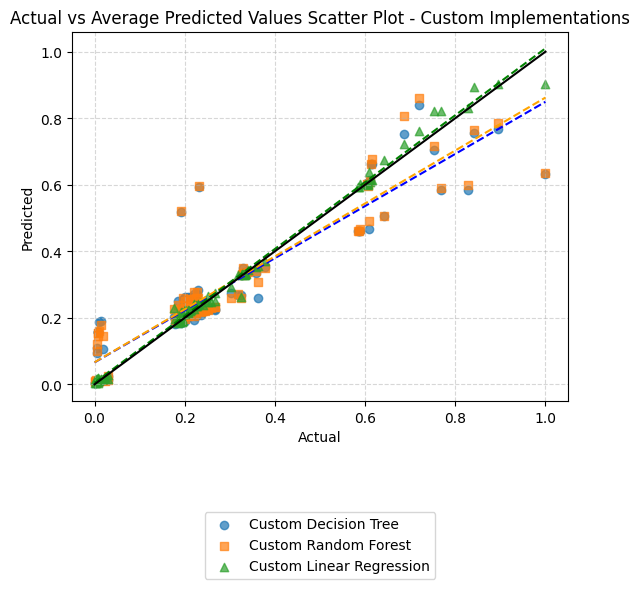

In [6]:
# Custom Decision Tree vs Custom Random Forest vs Custom Linear Regression
y_test_numeric = np.asarray(y_test, dtype=np.float64)
DT_Prediction_Numeric = np.asarray(DT_Average_Predictions, dtype=np.float64)
RF_Prediction_Numeric = np.asarray(RF_Average_Predictions, dtype=np.float64)
LR_Prediction_Numeric = np.asarray(LR_Average_Predictions, dtype=np.float64)

plt.scatter(y_test, DT_Prediction_Numeric, alpha=0.7, marker='o', label='Custom Decision Tree')
plt.scatter(y_test, RF_Prediction_Numeric, alpha=0.7, marker='s', label='Custom Random Forest')
plt.scatter(y_test, LR_Prediction_Numeric, alpha=0.7, marker='^', label='Custom Linear Regression')

# Regression lines
plt.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, DT_Prediction_Numeric, 1))(np.unique(y_test)), color='blue', linestyle='--')
plt.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, RF_Prediction_Numeric, 1))(np.unique(y_test)), color='orange', linestyle='--')
plt.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, LR_Prediction_Numeric, 1))(np.unique(y_test)), color='green', linestyle='--')

# Reference line
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='-', color='black')

plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Average Predicted Values Scatter Plot - Custom Implementations')

plt.legend(['Custom Decision Tree', 'Custom Random Forest', 'Custom Linear Regression'], loc='lower center', bbox_to_anchor=(0.5,-0.5))
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# Line Plot - Actual vs Predicted values

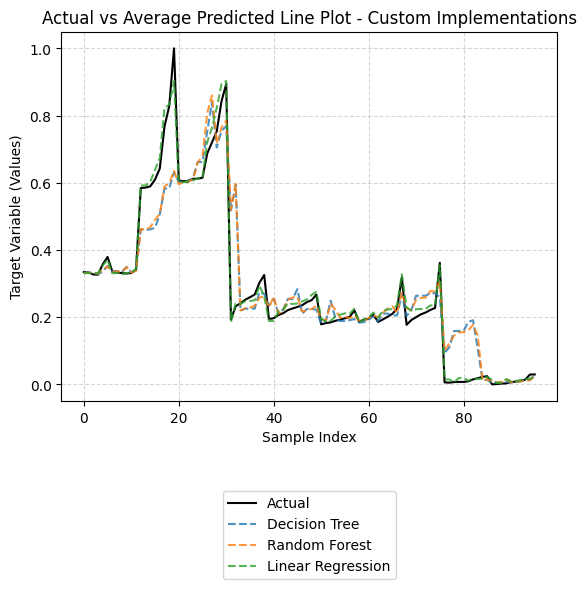

In [7]:
# Custom Decision Tree vs Custom Random Forest vs Custom Linear Regression
plt.plot(y_test.values, label='Actual', color='black', linestyle='-')
plt.plot(DT_Average_Predictions, label='Decision Tree', alpha=0.8, linestyle='--')
plt.plot(RF_Average_Predictions, label='Random Forest', alpha=0.8, linestyle='--')
plt.plot(LR_Average_Predictions, label='Linear Regression', alpha=0.8, linestyle='--')
plt.xlabel('Sample Index')
plt.ylabel('Target Variable (Values)')
plt.title('Actual vs Average Predicted Line Plot - Custom Implementations')
plt.legend(loc='lower center', bbox_to_anchor=(0.5,-0.5))
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# Residual Plots

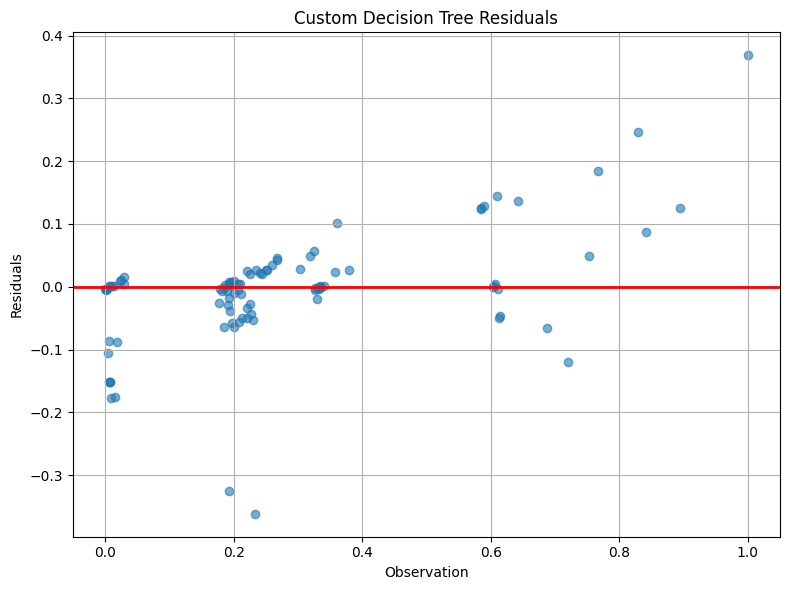

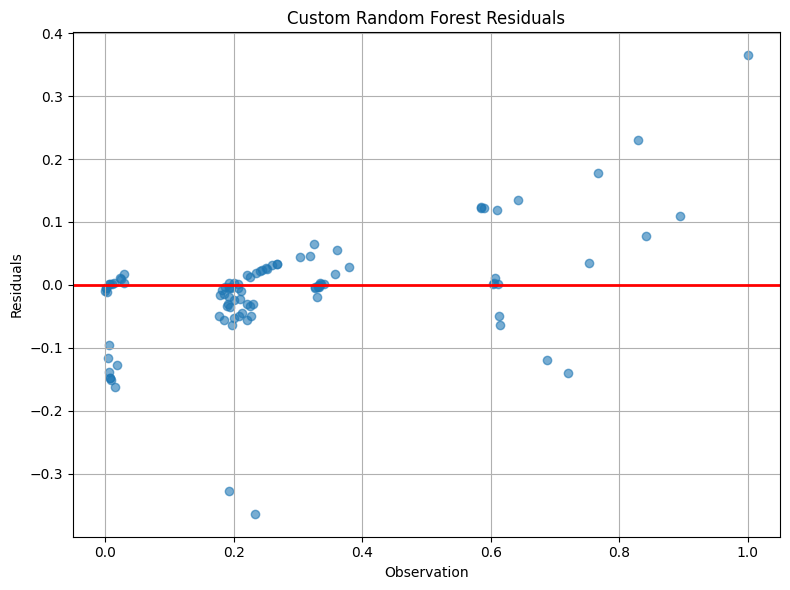

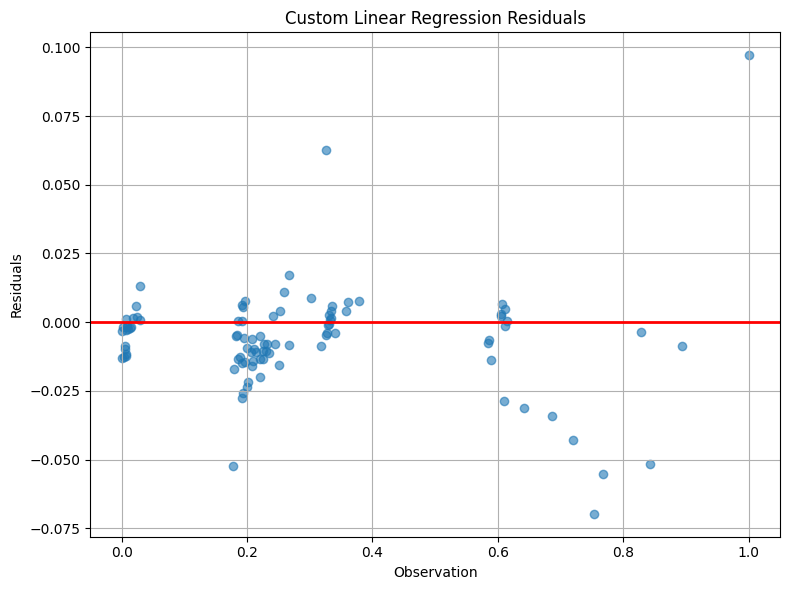

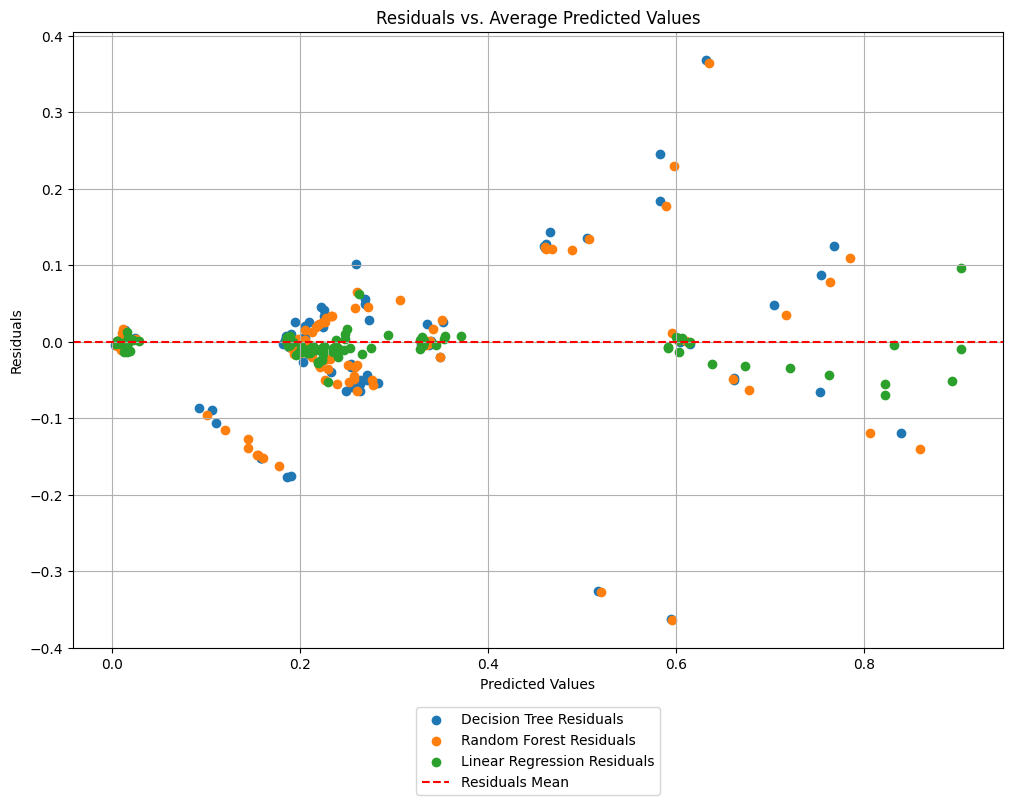

In [8]:
DT_Residuals = y_test - DT_Average_Predictions
RF_Residuals = y_test - RF_Average_Predictions
LR_Residuals = y_test - LR_Average_Predictions

# Plot for Custom Decision Tree
plt.figure(figsize=(8, 6))
plt.scatter(y_test, DT_Residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='-', linewidth=2)
plt.grid(True)
plt.xlabel('Observation')
plt.ylabel('Residuals')
plt.title('Custom Decision Tree Residuals')
plt.tight_layout()
plt.show()

# Plot for Custom Random Forest
plt.figure(figsize=(8, 6))
plt.scatter(y_test, RF_Residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='-', linewidth=2)
plt.grid(True)
plt.xlabel('Observation')
plt.ylabel('Residuals')
plt.title('Custom Random Forest Residuals')
plt.tight_layout()
plt.show()

# Plot for Custom Linear Regression
plt.figure(figsize=(8, 6))
plt.scatter(y_test, LR_Residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='-', linewidth=2)
plt.grid(True)
plt.xlabel('Observation')
plt.ylabel('Residuals')
plt.title('Custom Linear Regression Residuals')
plt.tight_layout()
plt.show()

# Residuals vs. Predicted Values for all models
plt.figure(figsize=(12, 8))
plt.scatter(DT_Average_Predictions, DT_Residuals, label='Decision Tree Residuals')
plt.scatter(RF_Average_Predictions, RF_Residuals, label='Random Forest Residuals')
plt.scatter(LR_Average_Predictions, LR_Residuals, label='Linear Regression Residuals')
plt.axhline(y=0, color='r', linestyle='--', label='Residuals Mean')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Average Predicted Values')
plt.legend(loc='lower center', bbox_to_anchor=(0.5,-0.25))
plt.grid(True)
plt.show()

# Mean Absolute Error, Mean Squared Error, Root Mean Squared Error, R Squared, Cross-Validation, Explained Variance

In [9]:
table_data = {
    '': ['Custom Decision Tree Regressor', 'Custom Random Forest Regressor', 'Custom Linear Regression'],
    'Average Time to run in seconds': [DT_Average_Time, RF_Average_Time, LR_Average_Time],
    'Average Mean Absolute Error': [DT_Average_MAE, RF_Average_MAE, RF_Average_MAE],
    'Average Median Absolute Error': [DT_Average_MedianAE, RF_Average_MedianAE, LR_Average_MedianAE],
    'Average Mean Squared Error': [DT_Average_MSE, RF_Average_MSE, LR_Average_MSE],
    'Average Root Mean Squared Error': [DT_Average_RMSE, RF_Average_RMSE, LR_Average_RMSE],
    'Average R Squared': [DT_Average_R2, RF_Average_R2, LR_Average_R2],
    'Average Explained Variance': [DT_Average_Explained_Variance, RF_Average_Explained_Variance, LR_Average_Explained_Variance],
    'Average Maximum Error': [DT_Average_MaxError, RF_Average_MaxError, LR_Average_MaxError]
}

print(tabulate(table_data, headers='keys', tablefmt='fancy_grid'))

╒════════════════════════════════╤══════════════════════════════════╤═══════════════════════════════╤═════════════════════════════════╤══════════════════════════════╤═══════════════════════════════════╤═════════════════════╤══════════════════════════════╤═════════════════════════╕
│                                │   Average Time to run in seconds │   Average Mean Absolute Error │   Average Median Absolute Error │   Average Mean Squared Error │   Average Root Mean Squared Error │   Average R Squared │   Average Explained Variance │   Average Maximum Error │
╞════════════════════════════════╪══════════════════════════════════╪═══════════════════════════════╪═════════════════════════════════╪══════════════════════════════╪═══════════════════════════════════╪═════════════════════╪══════════════════════════════╪═════════════════════════╡
│ Custom Decision Tree Regressor │                        0.0562564 │                     0.0137364 │                      0.00532661 │                  0

# Actual vs Predicted Values

╒═════════════════╤═══════════════════════════════╤═══════════════════════════════╤═══════════════════════════════╕
│   Actual Values │   Average DT Predicted Values │   Average RF Predicted Values │   Average LR Predicted Values │
╞═════════════════╪═══════════════════════════════╪═══════════════════════════════╪═══════════════════════════════╡
│      0.334296   │                    0.333369   │                    0.331222   │                    0.330164   │
├─────────────────┼───────────────────────────────┼───────────────────────────────┼───────────────────────────────┤
│      0.332832   │                    0.332731   │                    0.332208   │                    0.332164   │
├─────────────────┼───────────────────────────────┼───────────────────────────────┼───────────────────────────────┤
│      0.327017   │                    0.331694   │                    0.331085   │                    0.330982   │
├─────────────────┼───────────────────────────────┼─────────────────────

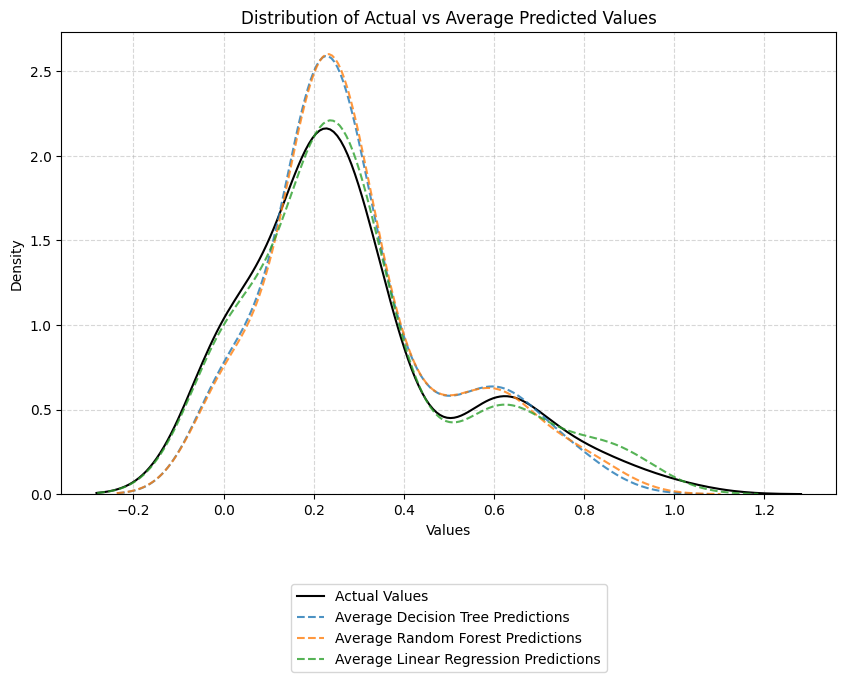

In [10]:
results_table_data = {
    'Actual Values': y_test,
    'Average DT Predicted Values': DT_Average_Predictions,
    'Average RF Predicted Values': RF_Average_Predictions,
    'Average LR Predicted Values': LR_Average_Predictions
}

print(tabulate(results_table_data, headers='keys', tablefmt='fancy_grid'))

plt.figure(figsize=(10, 6))
sns.kdeplot(y_test, label='Actual Values', color='black', linestyle='-')
sns.kdeplot(DT_Average_Predictions, label='Average Decision Tree Predictions', alpha=0.8, linestyle='--')
sns.kdeplot(RF_Average_Predictions, label='Average Random Forest Predictions', alpha=0.8, linestyle='--')
sns.kdeplot(LR_Average_Predictions, label='Average Linear Regression Predictions', alpha=0.8, linestyle='--')
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Distribution of Actual vs Average Predicted Values')
plt.legend(loc='lower center', bbox_to_anchor=(0.5,-0.4))
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()